<!--COURSE_INFORMATION-->
*This notebook contains course material from [CBE 40455 Process Operations](http://jckantor.github.io/CBE40455/) by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE40455).*
*The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Getting Started with GNU MathProg in Jupyter Notebooks](01.03-Getting-Started-with-GNU-MathProg.ipynb) | [Contents](index.ipynb) | [Simulation of Discrete Event Systems](02.00-Simulation-of-Discrete-Event-Systems.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/CBE40455/blob/master/notebooks/01.04-Getting-Started-with-Pandas.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Getting Started with Pandas

[Pandas](http://pandas.pydata.org/) is an open-source Python library for managing and analyzing data sets. It's been widely used by data scientists, and should be your 'go-to' tool for working with tabular data in Python. 

The purpose of the notebook is to introduce you to the use of Pandas in the context of exploratory data analysis.

## Example: Relationship between Crude Oil Futures and Petroleum Stocks

The futures market is used in the supply chain for petroleum products as a means of mitigating the risk of price change.  Some airlines, for example, will purchase heating oil futures to hedge the risk of unfavorable changes in fuel prices for advance ticket sales.

In this example we'll use the Pandas library to obtain historical data on the price of crude oil futures for West Texas Intermediate (WTI) traded on the New York Mercantile Exchange, and look for possible correlations with historical data on US petroeum stocks maintained by the Energy Information Agency of US Department of Energy.  

This example will demonstrate the use of pandas to 

* import data from spreadsheets and databases
* reorganize data into time series
* relabel data
* adding computed data columns
* plot and visual data
* use advanced functions such as autocorrelation
* manipulating data
* linear regression using additional libraries

This only touches a portion of the functionality in the extensive Pandas library, but is hopefully it is enough to get you started. You may find the following 'cheat sheets' useful as you put these tools to work on your problems:

* The [pandas-dev Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).  My personal favorite.
* [Datacamp Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf)
* [Dataquest Cheat Sheet](https://www.dataquest.io/blog/images/cheat-sheets/pandas-cheat-sheet.pdf) with additional [tutorial](https://www.dataquest.io/blog/pandas-cheat-sheet/). This is a bit dated, some of the functions have been changed since this was written.


### Importing the Pandas Library

The Pandas library is normally part of any Python distribution, so we can skip over installation step.  All we have to do is import the library. A common convention is to use 'pd' as a prefix for components of the library.

In [18]:
%matplotlib inline
import pandas as pd

## Reading Inventory Data from a Spreadsheet

In this first example we'll use the Pandas library to read spreadsheet data stored in a comma separated values (.csv) format. This particular file contains historical data on US petroleum stocks previously downloaded from the [EIA](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=WTESTUS1&f=W) web site.

The first step is to examine the first few lines of the file to see what's there. Here we print the first 10 lines of the data file.

In [19]:
fname = '../data/Weekly_U.S._Ending_Stocks_excluding_SPR_of_Crude_Oil_and_Petroleum_Products.csv'

with open(fname, 'r') as f:
    for k in range(0,10):
        print("Line",k,":",f.readline(),end='')

Line 0 : Weekly U.S. Ending Stocks excluding SPR of Crude Oil and Petroleum Products
Line 1 : https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=WTESTUS1&f=W
Line 2 : 16:55:13 GMT-0400 (EDT)
Line 3 : Source: U.S. Energy Information Administration
Line 4 : Week of,Weekly U.S. Ending Stocks excluding SPR of Crude Oil and Petroleum Products Thousand Barrels
Line 5 : 09/15/2017,1305605
Line 6 : 09/8/2017,1312163
Line 7 : 09/1/2017,1310418
Line 8 : 08/25/2017,1303390
Line 9 : 08/18/2017,1304490


We see that lines 0 - 3 contain descriptions of the data included in the file and should be dropped when we import the data. Line 4 holds the title of each column of subsequent data. The followings lines are date,value pairs.  

The pandas library has a read_csv() function built precisely for this task. In this case we call read_csv() with arguments providing the file name, how many header lines to ignore, to designate the first column (column 0) as the index in the result, and to parse the first column as calendar dates. We use the head() function to display the first few rows of the resulting object.

In [20]:
petroleum = pd.read_csv(fname,header=4,parse_dates=[0])
petroleum.head()

,Week of,Weekly U.S. Ending Stocks excluding SPR of Crude Oil and Petroleum Products Thousand Barrels
0,2017-09-15,1305605
1,2017-09-08,1312163
2,2017-09-01,1310418
3,2017-08-25,1303390
4,2017-08-18,1304490


The object 'oil' is an example of a Pandas dataframe. This particular example has an index on the left hand side, and two columns. These column names are cumbersome, so we'll rename them.

In [21]:
petroleum.columns = ['Week','Stocks']
petroleum.head()

,Week,Stocks
0,2017-09-15,1305605
1,2017-09-08,1312163
2,2017-09-01,1310418
3,2017-08-25,1303390
4,2017-08-18,1304490


In [22]:
petroleum.describe()

,Stocks
count,1.446000e+03
mean,1.035173e+06
std,1.026628e+05
min,8.656100e+05
25%,9.758422e+05
50%,1.017808e+06
75%,1.066621e+06
max,1.374047e+06


Let's plot the the data to see what we have.

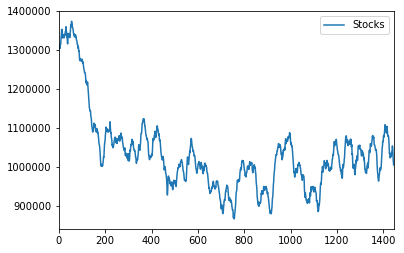

In [23]:
%matplotlib inline
petroleum.plot()

This isn't quite what we want. The horizontal axis is the row index, and because the data is given in reverse chronological order, it appears to be plotted backwards. We'll fix this by changing the index to be the dates, then sorting the dataframe into ascending order.

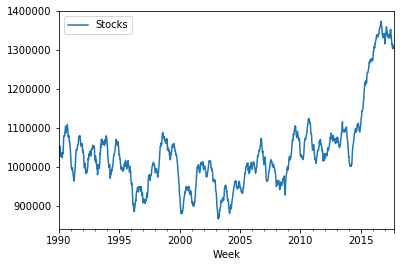

In [24]:
petroleum = petroleum.set_index('Week')
petroleum = petroleum.sort_index()
petroleum.plot()

Finally, let's create a new column containing the change in US Petroleum inventories.

In [25]:
petroleum['Change'] = petroleum['Stocks'].diff()
petroleum.head()

,Stocks,Change
Week,,
1990-01-05,1004329,NaN
1990-01-12,1013190,8861.0
1990-01-19,1019846,6656.0
1990-01-26,1032697,12851.0
1990-02-02,1050719,18022.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12140cc50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x121486b00>], dtype=object)

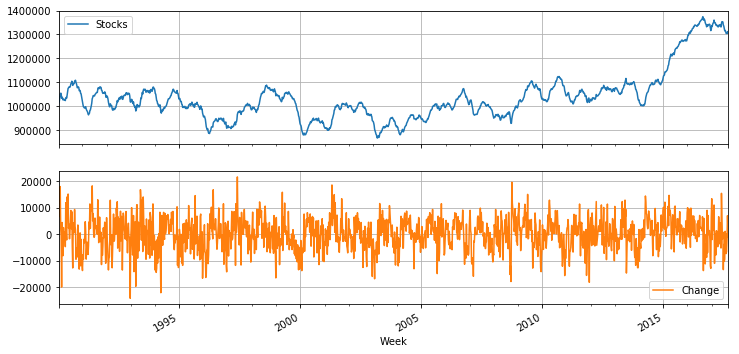

In [26]:
petroleum = petroleum.dropna()
petroleum.plot(subplots=True, figsize=(12,6), grid=True)

We see that the change in inventory has a random look. Let's check the histogram to see if has the shape of a bell shaped curve.

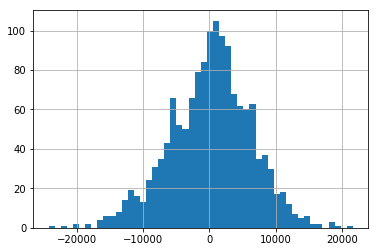

In [27]:
petroleum['Change'].hist(bins=50)

This may look like random noise. When looking at time series data, one of the critical questions is the degree to which one sample from the time series is correlated with subsequent samples. This is called 'autocorrelation'. If there is a high degree of autocorrelation that extends over lengthy time intervals, then there usually there exists some underlying dynamics responsible for the autocorrelation.

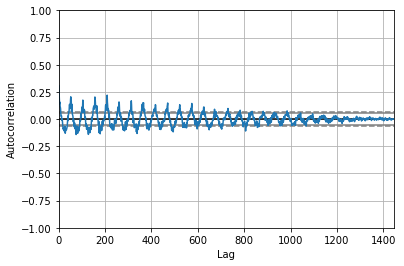

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(petroleum['Change'])

What's now clear is that there is annual cycle to this data that's greater than the 95% and 99% confidence intervals. This makes sense ... the usage of petroleum products depends on seaons, so it makes sense that their inventories would change on an annual basis.  

To remove the within year variations in stocks, we plot mean petroleum inventories by grouping the data into years, computing annual means, and making a bar plot.

                            OLS Regression Results                            
Dep. Variable:                 Change   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     91.67
Date:                Thu, 28 Sep 2017   Prob (F-statistic):           3.33e-38
Time:                        08:44:10   Log-Likelihood:                -14576.
No. Observations:                1445   AIC:                         2.916e+04
Df Residuals:                    1442   BIC:                         2.917e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.5433    153.133      1.199      0.2

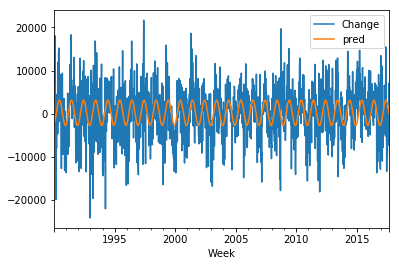

In [30]:
import statsmodels.formula.api as sm
import numpy as np

petroleum['doy'] = petroleum.index.dayofyear/365.25
petroleum['sin'] = np.sin(2*np.pi*petroleum['doy'])
petroleum['cos'] = np.cos(2*np.pi*petroleum['doy'])

result = sm.ols(formula='Change ~ sin + cos', data=petroleum).fit()
print(result.summary())
print(result.params)

petroleum['pred'] = result.params[0] + result.params[1]*petroleum['sin'] + result.params[2]*petroleum['cos']
petroleum[['Change','pred']].plot()


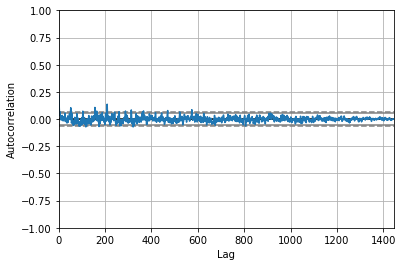

In [31]:
petroleum['resid'] = petroleum['Change']-petroleum['pred']
autocorrelation_plot(petroleum['resid'])

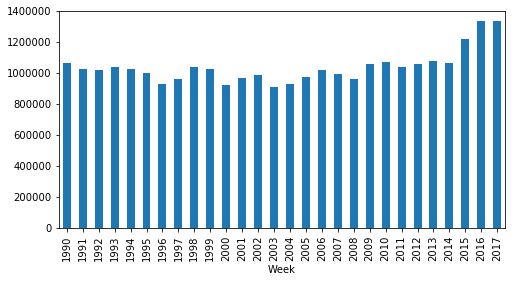

In [33]:
petroleum['Stocks'].groupby(petroleum.index.year).mean().plot(kind='bar',figsize=(8,4))

## Reading Futures Data with a Web API

Why are Petroleum stocks going up in recent years? A web search returned the following results ...

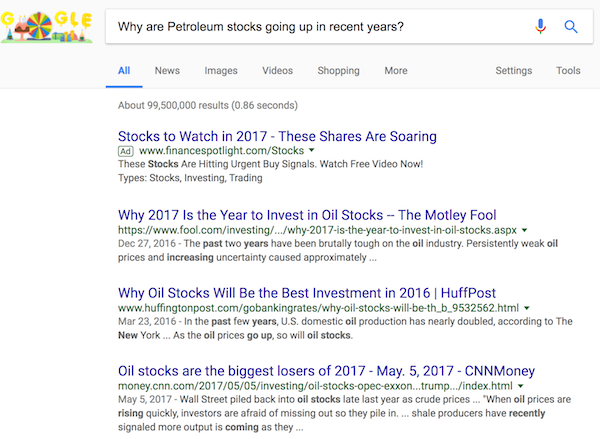

Here we're going to explore possible relationships between the futures market for crude oil and the inventory of US petroleum stocks.

Futures are standardized contracts on a particular market for the future delivery of a commodity (in this case, [crude oil futures](http://www.cmegroup.com/trading/energy/crude-oil/light-sweet-crude_contract_specifications.html)). Futures are widely traded, and provide a means for producers and consumers of a particular commodity to manage price risk.

Historical data on the price of future contracts is available from many commercial sources. Here we use [Quandl](https://www.quandl.com/) which makes many kinds of data sets available, including historical prices for selected commodity markets.

Quandl provides an application programming interface (API) available to access data sets. The needed python library is installed by the command

    conda install quandl

Historical data for 'front month' future price (sometimes called a 'spot' price), is imported from the Quandl web page with the following [Python code](https://www.quandl.com/data/SCF/CME_CL1_FN-NYMEX-WTI-Crude-Oil-Futures-1-CL1-Front-Month-Unadjusted-Prices-Roll-on-First-of-Month-Continuous-Contract-History) which directly imports the requested data into a pandas dataframe.

In [34]:
import quandl
CL1 = quandl.get("SCF/CME_CL1_FN", authtoken="xb1exKWPtyQvpbfqCZsB")

In [35]:
CL1.head()

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
Date,,,,,,
2005-01-03,43.10,43.10,41.25,42.12,69484.0,165451.0
2005-01-04,42.18,44.13,41.85,43.91,100665.0,161571.0
2005-01-05,43.90,44.00,42.60,43.39,91011.0,152795.0
2005-01-06,43.39,45.75,42.80,45.56,122411.0,148723.0
2005-01-07,45.50,46.10,44.75,45.43,99725.0,133184.0


What we're after is the daily settlement price contained in the column 'Settle'. Here we plot the data.

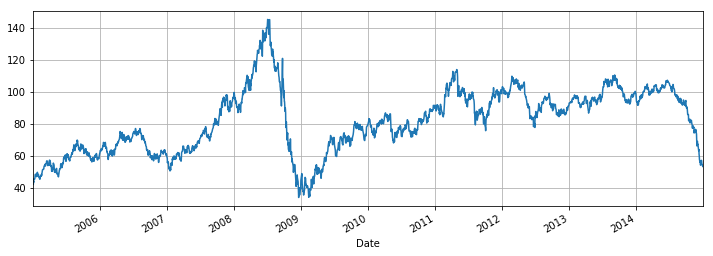

In [36]:
CL1['Settle'].plot(figsize=(12,4),grid=True)

Now that we know the data we want, let's download historical prices of the 'near 9 months) of futures.

In [37]:
CL2 = quandl.get("SCF/CME_CL2_FN", authtoken="xb1exKWPtyQvpbfqCZsB")
CL3 = quandl.get("SCF/CME_CL3_FN", authtoken="xb1exKWPtyQvpbfqCZsB")
CL4 = quandl.get("SCF/CME_CL4_FN", authtoken="xb1exKWPtyQvpbfqCZsB")
CL5 = quandl.get("SCF/CME_CL5_FN", authtoken="xb1exKWPtyQvpbfqCZsB")
CL6 = quandl.get("SCF/CME_CL6_FN", authtoken="xb1exKWPtyQvpbfqCZsB")
CL7 = quandl.get("SCF/CME_CL7_FN", authtoken="xb1exKWPtyQvpbfqCZsB")
CL8 = quandl.get("SCF/CME_CL8_FN", authtoken="xb1exKWPtyQvpbfqCZsB")
CL9 = quandl.get("SCF/CME_CL9_FN", authtoken="xb1exKWPtyQvpbfqCZsB")

Futures contracts come with different terms. In the case of crude oil, the most actively traded futures contracts are typically under a one year duration which roughly corresponds to the length of time it takes oil to transit the supply chain from well head to consumer use. This is the length of time over which producers are exposed to price risk, and therefore the most commonly used futures for hedging purposes.

We'll extract the historical settlement prices for first nine months of futures prices., and store the results in columns of a new dataframe. Notice how the pandas library handles all of the issues regarding alignment by dates, etc.

In [39]:
futures = pd.DataFrame()
futures['CL1'] = CL1['Settle']
futures['CL2'] = CL2['Settle']
futures['CL3'] = CL3['Settle']
futures['CL4'] = CL4['Settle']
futures['CL5'] = CL5['Settle']
futures['CL6'] = CL6['Settle']
futures['CL7'] = CL7['Settle']
futures['CL8'] = CL8['Settle']
futures['CL9'] = CL9['Settle']
futures.dropna(inplace=True)
futures.head()

,CL1,CL2,CL3,CL4,CL5,CL6,CL7,CL8,CL9
Date,,,,,,,,,
2005-01-03,42.12,42.34,42.37,42.19,41.98,41.77,41.58,41.40,41.21
2005-01-04,43.91,44.08,44.05,43.81,43.55,43.29,43.06,42.84,42.61
2005-01-05,43.39,43.61,43.55,43.29,43.01,42.73,42.48,42.25,42.01
2005-01-06,45.56,45.78,45.63,45.30,44.95,44.60,44.27,43.96,43.68
2005-01-07,45.43,45.65,45.47,45.11,44.74,44.37,44.03,43.70,43.40


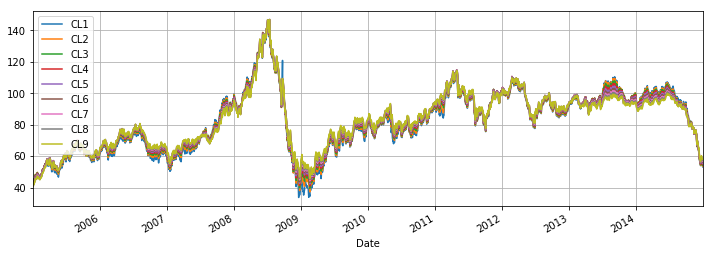

In [86]:
futures.plot(figsize=(12,4),grid=True)

It's difficult to see what's going on over such a long period, so let's zoom in and look more carefully at the periods from 2008-9, and 2013-15. We use the .loc method of indexing particular ranges of dates.

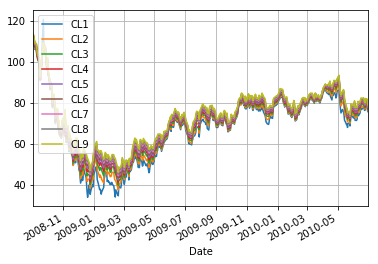

In [87]:
futures.loc['2008-09':'2010-06'].plot(grid=True)

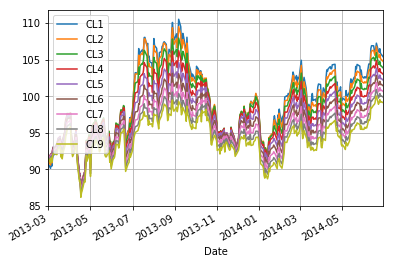

In [88]:
 futures.loc['2013-03':'2014-06'].plot(grid=True)

## Term Structure of Oil Futures

What we see are shifts in the relationship in future prices for crude oil. Let's look a bit more carefully at this by using the 'front month' to normalize the remaining futures. 

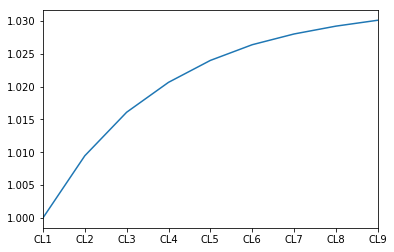

In [89]:
rfutures = futures.copy()
for col in rfutures.columns:
    rfutures[col] = futures[col]/futures['CL1']
    
rfutures.mean().plot()

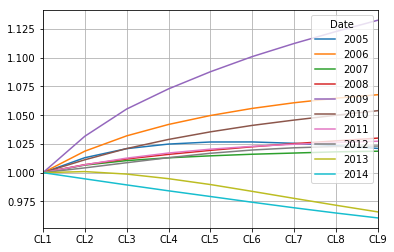

In [90]:
rfutures.groupby(rfutures.index.year).mean().T.plot(grid=True)

We imagine there is a monthly return $r_k$ that accrues as a result of owning an oil future for $k$ months. Then  on the value of oil

$$CL_k = (1+r)^k CL_0$$

Taking logaritms

$$\ln(CL_k) = k \ln(1+r) + \ln(CL_0)$$

which the equation of line with slope $\ln(1+r)$ and intercept $\ln(CL_0)$.  

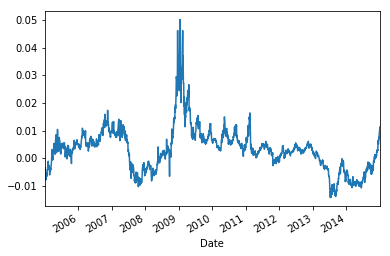

In [92]:
import numpy as np
from scipy.stats import linregress

r = []
x = np.linspace(1,9,9)
cl = ['CL1','CL2','CL3','CL4','CL5','CL6','CL7','CL8','CL9']
for i in range(0,len(futures)):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,np.log(futures.iloc[i,:]))
    r.append(np.exp(slope)-1)
    
rfutures = futures.copy()
rfutures['r'] = r
rfutures['r'].plot()

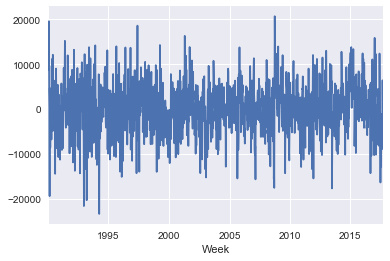

In [161]:
petroleum['resid'].plot()

In [95]:
y = petroleum['Change']
y.head()

Week
1990-01-12     8861.0
1990-01-19     6656.0
1990-01-26    12851.0
1990-02-02    18022.0
1990-02-09     2538.0
Name: Change, dtype: float64

In [96]:
z = rfutures.copy()
z.head()

,CL1,CL2,CL3,CL4,CL5,CL6,CL7,CL8,CL9,r
Date,,,,,,,,,,
2005-01-03,42.12,42.34,42.37,42.19,41.98,41.77,41.58,41.40,41.21,-0.003367
2005-01-04,43.91,44.08,44.05,43.81,43.55,43.29,43.06,42.84,42.61,-0.004377
2005-01-05,43.39,43.61,43.55,43.29,43.01,42.73,42.48,42.25,42.01,-0.004774
2005-01-06,45.56,45.78,45.63,45.30,44.95,44.60,44.27,43.96,43.68,-0.006087
2005-01-07,45.43,45.65,45.47,45.11,44.74,44.37,44.03,43.70,43.40,-0.006557


In [163]:
q = z.join(petroleum,how='outer').dropna()

In [164]:
q.head()

,CL1,CL2,CL3,CL4,CL5,CL6,CL7,CL8,CL9,r,Stocks,Change,doy,sin,cos,pred,resid
2005-01-07,45.43,45.65,45.47,45.11,44.74,44.37,44.03,43.70,43.40,-0.006557,944483.0,-4950.0,0.019165,0.120126,0.992759,-2408.416605,-2541.583395
2005-01-14,48.38,48.53,48.18,47.78,47.35,46.92,46.51,46.13,45.79,-0.007653,947390.0,2907.0,0.038330,0.238513,0.971139,-2223.670133,5130.670133
2005-01-21,48.53,48.60,48.37,48.02,47.64,47.26,46.89,46.54,46.25,-0.006653,945124.0,-2266.0,0.057495,0.353445,0.935455,-2004.060632,-261.939368
2005-01-28,47.18,47.44,47.52,47.40,47.17,46.84,46.50,46.15,45.84,-0.004212,941988.0,-3136.0,0.076660,0.463258,0.886224,-1752.768648,-1383.231352
2005-02-04,46.48,46.95,47.15,47.12,46.96,46.69,46.41,46.12,45.84,-0.002493,936592.0,-5396.0,0.095825,0.566362,0.824157,-1473.433576,-3922.566424


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1268c8048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1273cbfd0>], dtype=object)

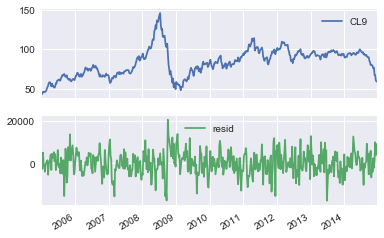

In [165]:
q[['CL9','resid']].plot(subplots=True)

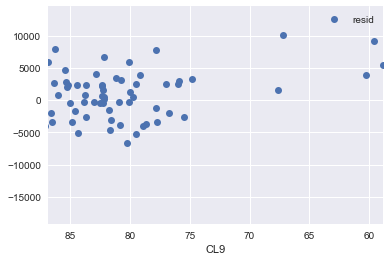

In [166]:
q.loc['2010':].plot(x = 'CL9',y = 'resid', style = 'o')

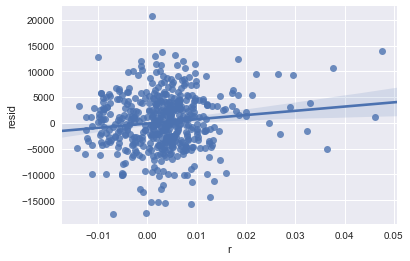

In [167]:
import seaborn as sns
sns.regplot(x=q['r'],y=q['resid'])

<!--NAVIGATION-->
< [Getting Started with GNU MathProg in Jupyter Notebooks](01.03-Getting-Started-with-GNU-MathProg.ipynb) | [Contents](index.ipynb) | [Simulation of Discrete Event Systems](02.00-Simulation-of-Discrete-Event-Systems.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/CBE40455/blob/master/notebooks/01.04-Getting-Started-with-Pandas.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
